In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def list_states(nq):
    """Lists the possible states in binary format of a
    register with nq qubits.
    
    Output
    states: list of strings in binary format containing the list
        of all possible states.
    
    Parameters
    nq: integer of the number of qubits.
    
    """
    states = []
    for k in range(2 ** nq):
        kbin = bin(k)[2:]
        while len(kbin) < nq:
            kbin = '0' + kbin
        states.append(kbin)
        
    return states

def pauli_base(nq):
    """Generates all the elements of an algebra given by
    (1/2)^{n/2}sigma_{i_1} otimes sigma_{i_2} otimes
    ... sigma_{i_n} using Eq. (B1) iteratively where
    sigma_0 is the 2 x 2 identity matrix and sigma_1,
    sigma_2 and sigma_3 are the Pauli matrices
    
    Output
    base_1: numpy array containing all the elements of
        the matrix base.
    
    Parameters
    nq: integer with the number of qubits.
    
    """
    base_0 = np.array([
        (1.0/np.sqrt(2.0) + 0j) * np.identity(2),
        (1.0/np.sqrt(2.0) + 0j) * np.array([[0, 1], [1, 0]]),
        (1.0/np.sqrt(2.0) + 0j) * np.array([[0, -1j], [1j, 0]]),
        (1.0/np.sqrt(2.0) + 0j) * np.array([[1, 0], [0, -1]])
    ])
    
    base_1 = base_0[:]
    
    for k in range(nq - 1):
        base_2 = []
        for el1 in base_1:
            for el0 in base_0:
                base_2.append(np.kron(el1, el0))
        base_1 = np.array(base_2)
    
    return base_1

In [2]:
# qubit number
nq = 7
base = pauli_base(3)

In [3]:
# Initial value of the density
# matrix
dim = 64
rho0 = np.zeros(dim)
sqt2 = 0.5 / np.sqrt(2)
rho0[0]  = sqt2
rho0[3]  = sqt2
rho0[12] = sqt2
rho0[15] = sqt2
rho0[48] = -sqt2
rho0[51] = -sqt2
rho0[60] = -sqt2
rho0[63] = -sqt2


In [4]:
# Read results DataFrames and unpack them
if True:
    df_od = pd.read_csv('Results/example-3/results_od.csv')
    shp = df_od.shape
    t_list_od = df_od['0'].tolist()
    rho_list_od = df_od[[str(ii) for ii in range(1, shp[1] - 1)]].to_numpy()
    
if True:
    df_qg = pd.read_csv('Results/example-3/results_qg.csv')
    shp = df_qg.shape
    t_list_qg = df_qg['0'].tolist()
    rho_list_qg = df_qg[[str(ii) for ii in range(1, shp[1] - 1)]].to_numpy()

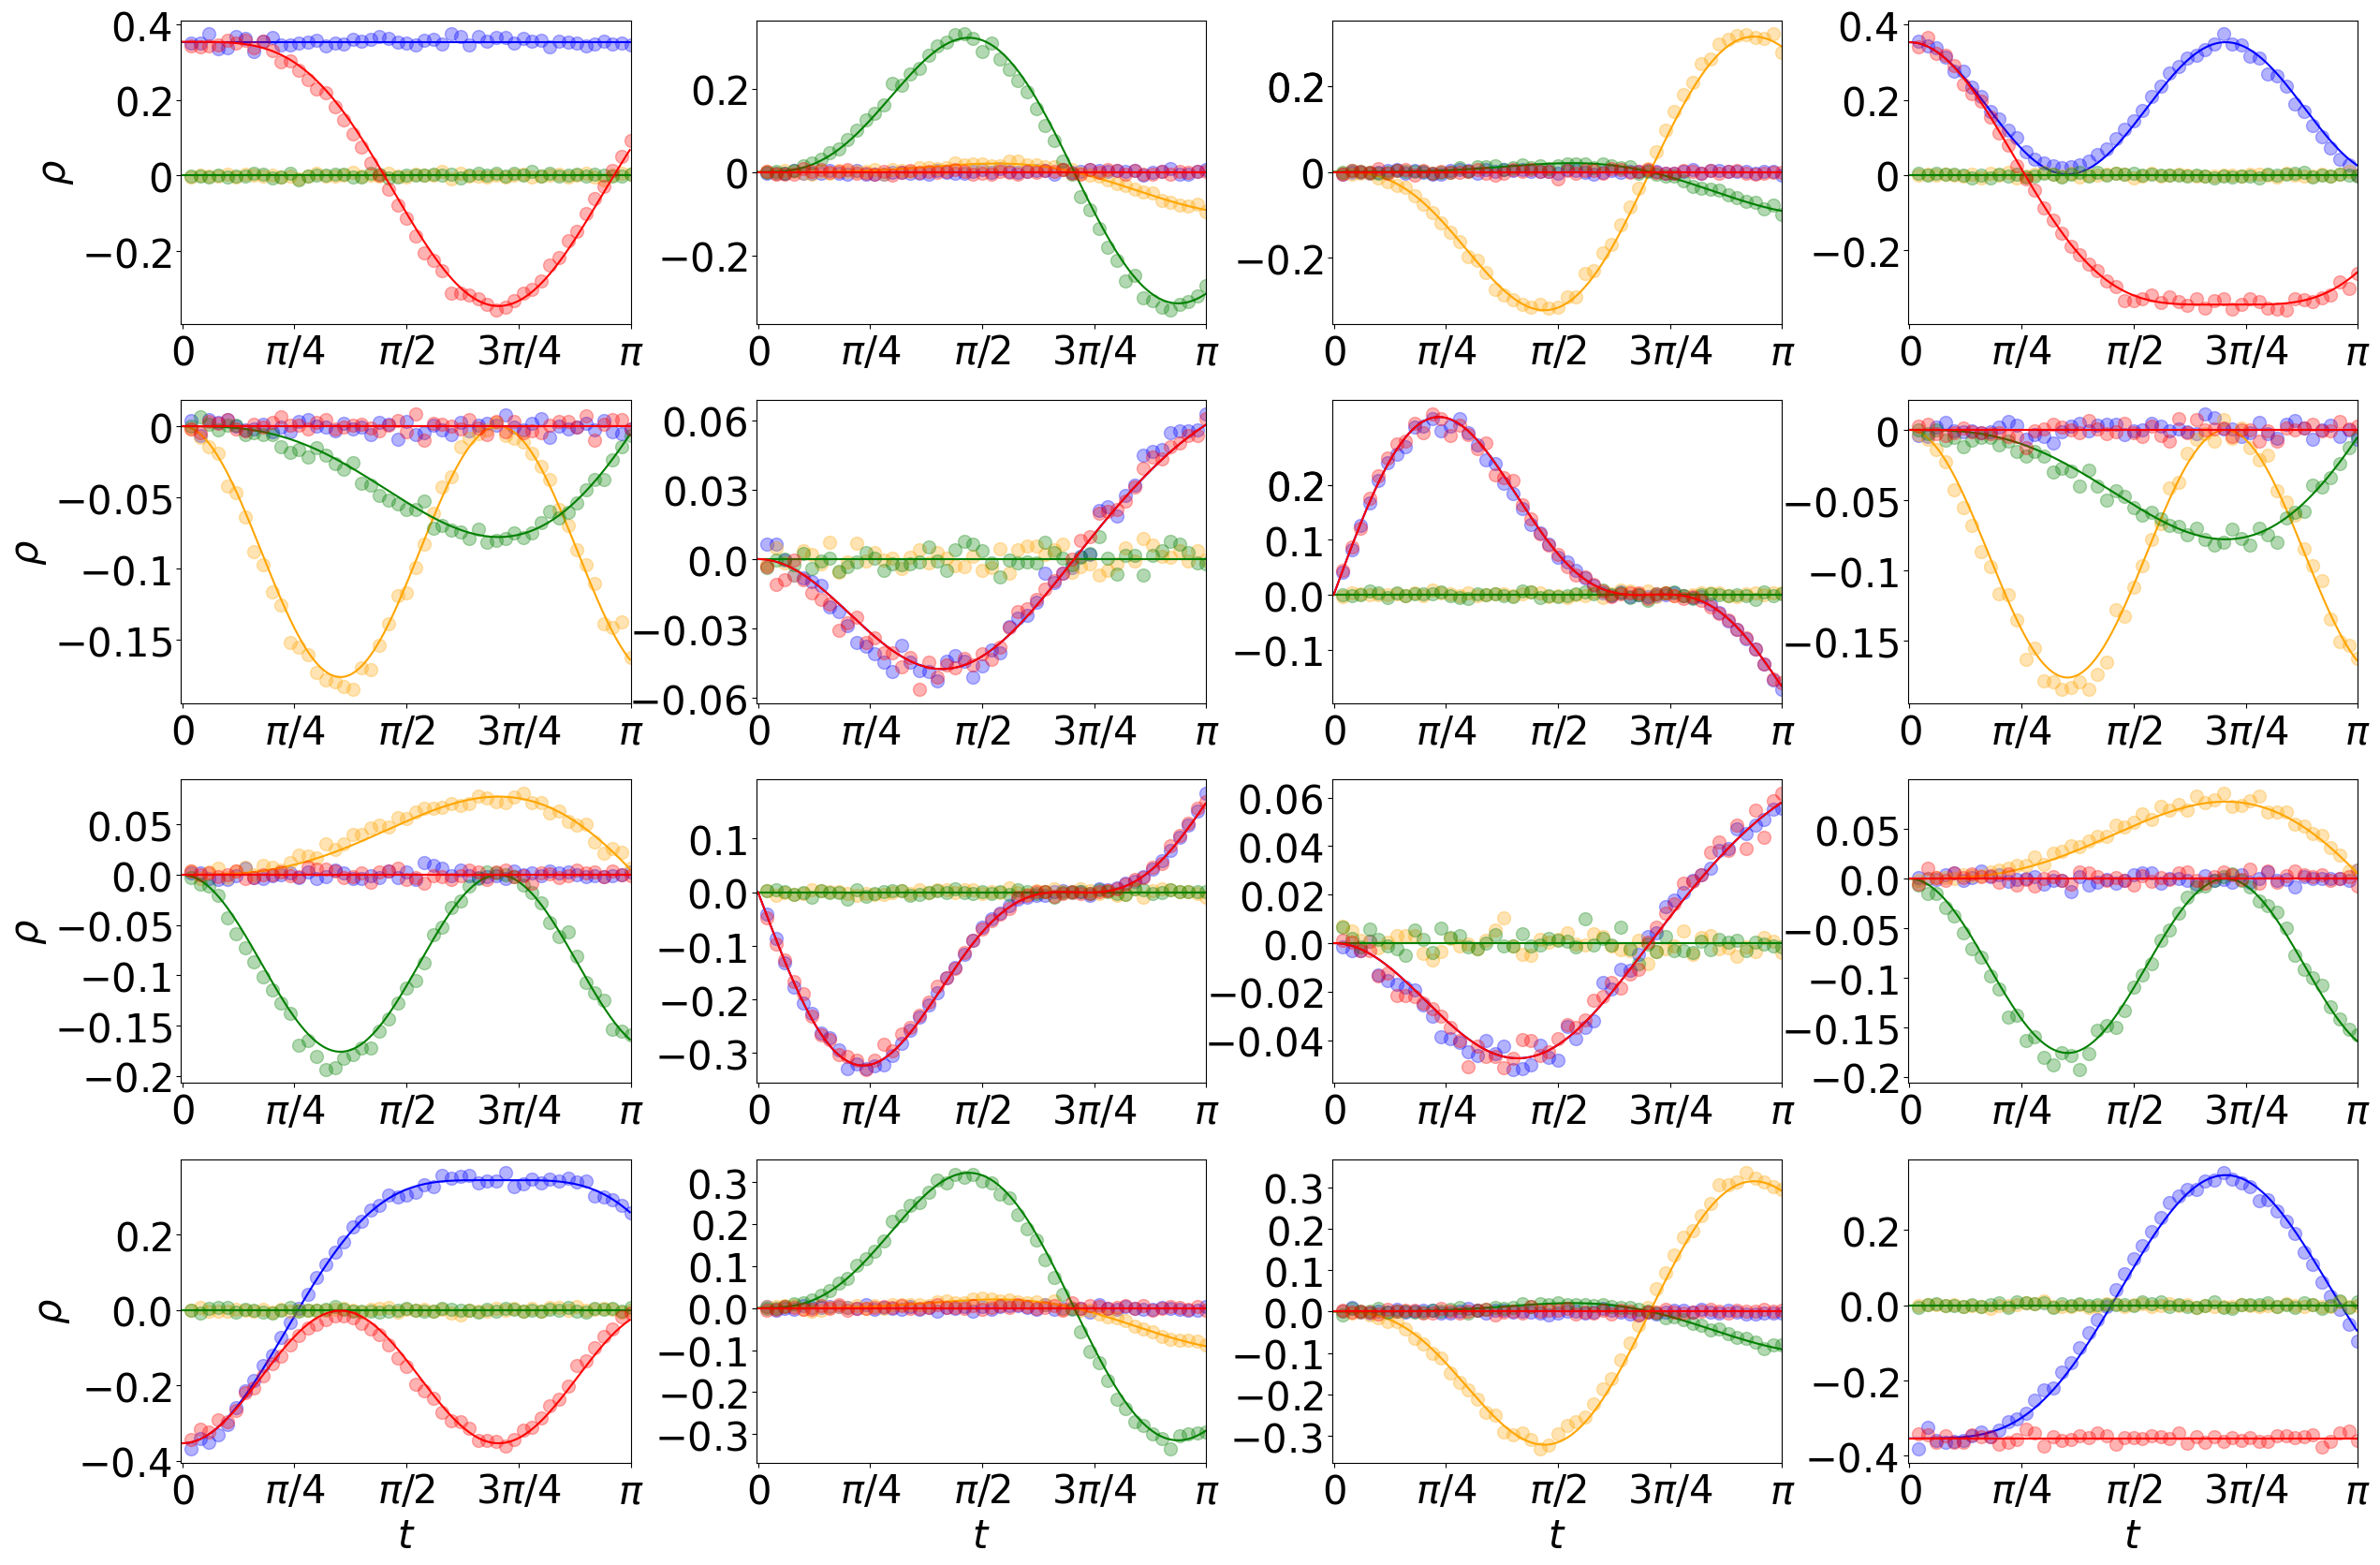

In [7]:
# Plot the density matrix coefficients
# from the classical and quantum
# simulations.
# The continuous lines are the classical
# simulation and the dots correspond
# to the quantum simulation.

# Plot quantum algorithm results if plot_qg=True
# otherwise do not plot them
plot_qg = True

colors = ['blue', 'orange', 'green', 'red']
y_lims = [[(-0.2, 0, 0.2, 0.4), (-0.2, 0, 0.2), (-0.2, 0, 0.2, 0.2), (-0.2, 0, 0.2, 0.4)],
         [(-0.15, -0.1, -0.05, 0), (-0.06, -0.03, 0.0, 0.03, 0.06),
          (-0.1, 0.0, 0.1, 0.2, 0.2), (-0.15, -0.1, -0.05, 0)],
         [(-0.2, -0.15, -0.10, -0.05, 0.0, 0.05), (-0.3, -0.2, -0.1, 0.0, 0.1),
          (-0.04, -0.02, 0.0, 0.02, 0.04, 0.06), (-0.2, -0.15, -0.10, -0.05, 0.0, 0.05)],
         [(-0.4, -0.2, 0.0, 0.2), (-0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3),
         (-0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3), (-0.4, -0.2, 0.0, 0.2)]]

fig = plt.figure(figsize=(30,20))
plt.rc('axes', labelsize=20) 
gs = fig.add_gridspec(4,4, hspace=0.25,wspace=0.28)
ax = gs.subplots()

system_states = list_states(nq - 1)
for state in system_states:
    k = int(state, 2)
    ii = k // 16
    jj = k % 16 // 4
    kk = k % 4
    tag = '$\\rho_{' + str(k + 1) + '}$'
    if plot_qg :
        ax[ii, jj].plot(t_list_qg, rho_list_qg[:, k], 
               '.', alpha = 0.3, markersize = 20, color = colors[kk])
    ax[ii, jj].plot(t_list_od, rho_list_od[:, k],
            '-' , color = colors[kk])
    ax[ii, jj].set_xlim([-0.01, np.pi])
    ax[ii, jj].set_xticks([np.pi * ii/4 for ii in range(0, 5)])
    ax[ii, jj].set_xticklabels(['$0$', '$\\pi/4$', '$\\pi/2$', '$3\\pi/4$', '$\\pi$'], fontsize=30)
    ax[ii, jj].set_yticks(y_lims[ii][jj])
    ax[ii, jj].set_yticklabels(['$' + str(y) + '$' for y in y_lims[ii][jj]], fontsize=30)
    
    if ii == 3:
        ax[ii, jj].set_xlabel('$t$', fontsize=30)
    if jj == 0:
        ax[ii, jj].set_ylabel('$\\rho $', fontsize=30)
    


plt.savefig('fig.pdf')
    
plt.show()


In [9]:
# Calculate the expected value of
# the position using the density matrix
# coefficients as <x> = Tr[\hat{x}\hat{\rho}].
# where x is the position operator
# in the 
x = np.zeros((8, 8))
x[1, 1] = 2
x[2, 2] = 1
x[3, 3] = 3
x[5, 5] = 2
x[6, 6] = 1
x[7, 7] = 3


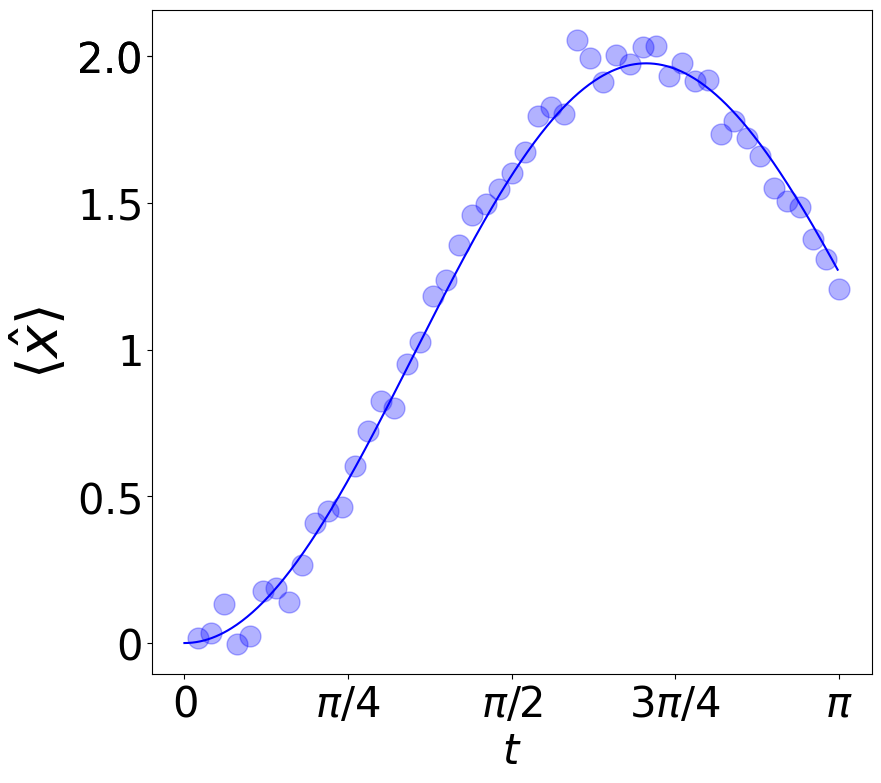

In [11]:
# Plot expected values for the first particle

ops = [x,]

colors = ['blue', 'orange', 'green', 'red']
y_lims = [0, 0.5, 1, 2, 1.5, 2.0]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

for jj, op in enumerate(ops):
    am_op_qg = 0.0j * np.zeros((np.shape(rho_list_qg)[0]))
    am_op_od = 0.0j * np.zeros((np.shape(rho_list_od)[0]))

    for kk in range(dim):
        proj = np.trace(np.matmul(base[kk], op))
        am_op_qg[:] += rho_list_qg[:, kk] * proj
        am_op_od[:] += rho_list_od[:, kk] * proj

    av_op_qg = np.real(am_op_qg[:])
    av_op_od = np.real(am_op_od[:])

    ax.plot(t_list_qg, av_op_qg, 
            '.', alpha = 0.3, markersize = 30, color = colors[jj])
    ax.plot(t_list_od, av_op_od,
            '-' , color = colors[jj])
    ax.set_xticks([np.pi * ii/4 for ii in range(0, 5)])
    ax.set_xticklabels(['$0$', '$\\pi/4$', '$\\pi/2$', '$3\\pi/4$', '$\\pi$'], fontsize=30)
    ax.set_yticks(y_lims)
    ax.set_yticklabels(['$' + str(y) + '$' for y in y_lims], fontsize=30)

ax.set_xlabel('$t$', fontsize=30)
ax.set_ylabel('$\\left\\langle \\hat{x}\\right\\rangle$', fontsize=40)

plt.subplots_adjust(left=0.20, right=0.92, bottom=0.12, top=0.95)
plt.savefig('fig.pdf')

plt.show()